<a href="https://colab.research.google.com/github/EugeneBalakhnin/GameOfLife/blob/main/GameOfLife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [183]:
import random as rnd
import tensorflow as tf

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [ ]:
# To generate GIFs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

In [169]:
#@title Создания случайного расположения на поле

def life_generation(size: int): 
  life1 = []
  life2 = []

  for _ in range(size):
    life1 = []
    for _ in range(size):
      i = rnd.choice([0, 1])
      life1.append(i)
    life2.append(life1)
  return life2

In [254]:
#@title Подсчёт соседей в клетке

def neighborhood_array(life: list):

  def near(life: list, pos: list, system=[[-1 , -1] , [-1 , 0] , [-1 , 1] , [0 , -1] , [0 , 1] , [1 , -1] , [1 , 0] , [1 , 1]]):
    count = 0
    for i in system:
        if life[(pos[0] + i[0]) % len(life)][(pos[1] + i[1]) % len(life[0])]:
            count += 1
    return count

  neighborhood_array = []
  for i in range(len(life)):
    row = []
    for j in range(len(life)):
      row.append(near(life, [i, j]))
    neighborhood_array.append(row)
    

  return neighborhood_array

In [270]:
#@title Вывод

def output(life: list):

  for i in range(len(life)):
    for j in range(len(life)):
      t = life[i][j]
      life[i][j] = 0 if t else 1 

  plt.imshow(life, cmap='gray')
  plt.axis('off')
  # plt.title("life")
  plt.savefig('image_at_epoch_{:04d}.png'.format(iter))
  plt.show()

  for i in range(len(life)):
    for j in range(len(life)):
      t = life[i][j]
      life[i][j] = 0 if t else 1

#Main

In [275]:
size = 100
epoch = 1000


life = life_generation(size)

# life = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]]

# print("life")
# print(pd.DataFrame(life))

# output(life)


for iter in range(epoch):
  
  # print("liffff", life)
  neighbors = neighborhood_array(life)

  # print("neighbors")
  # print(pd.DataFrame(neighbors))

  for i in range(size):
    for j in range(size):
      n = neighbors[i][j]
      l = life[i][j]

      if not l: 
        if n == 3 :
          life[i][j] = 1
        else:
          life[i][j] = 0
    
      if l:
        if n == 2 or n == 3:
          life[i][j] = 1
        else:
          life[i][j] = 0

    # output(life)

  # output(life)
  

#Create GIF

In [276]:
# Display a single image using the epoch number
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [277]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


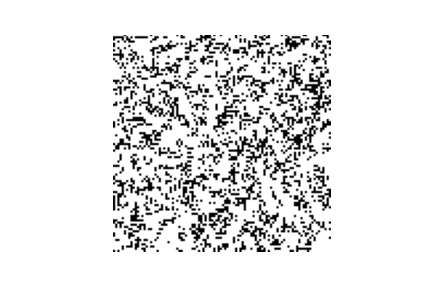

In [278]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)